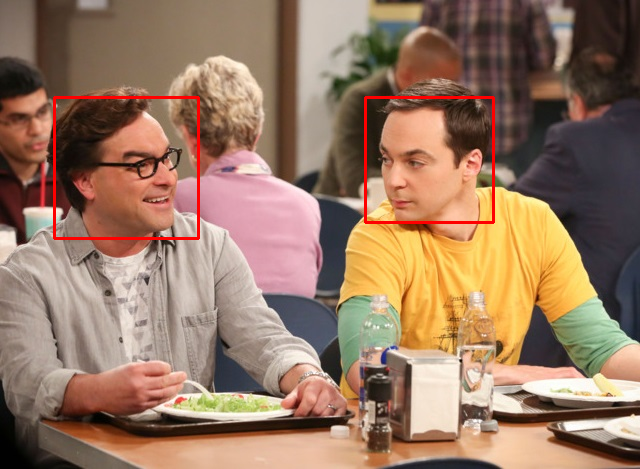

In [1]:
import cv2
import numpy as np
from detector import run as detect
from PIL import Image
from IPython.display import display

im = cv2.imread('./samples/bbt2.jpg')[:480,:640,::-1]
boxes = detect(im)
teaser = im.copy()
for b in boxes:
    b = (b[:4]).astype(np.int32)
    cv2.rectangle(teaser, b[:2], b[2:], (255,0,0), 2)

display(Image.fromarray(teaser))

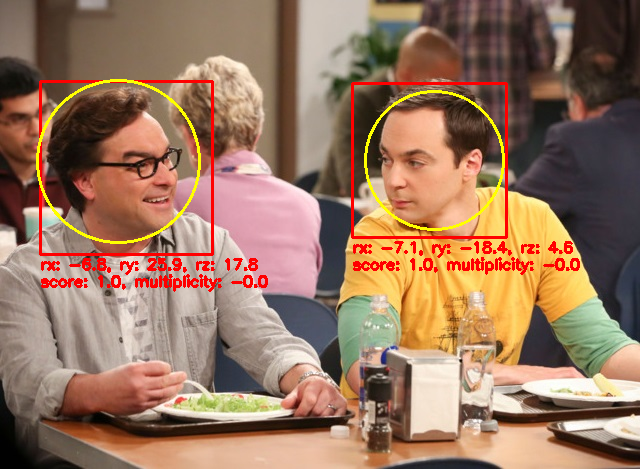

In [2]:
import math
from hpe import run as hpe

y, rois = hpe(im, boxes)
teaser = im.copy()
for i in range(len(y)):
    a = y[i]
    b = rois[i]
    b = (b[:4]).astype(np.int32)
    cv2.rectangle(teaser, b[:2], b[2:], (255,0,0), 2)
    center = (int(a[0]), int(a[1]))
    cv2.circle(teaser, center, int(a[2]), (255,255,0), 2)
    cv2.putText(teaser, f"rx: {math.degrees(a[4]):.1f}, ry: {math.degrees(a[3]):.1f}, rz: {math.degrees(a[5]):.1f}",
        (b[0], b[3] + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)
    cv2.putText(teaser, f"score: {a[6]:.1f}, multiplicity: {a[7]:.1f}",
        (b[0], b[3] + 32), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)

display(Image.fromarray(teaser))